<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

%matplotlib notebook

L: 40
732    2.292114
616    2.277517
648    2.281544
632    2.279530
656    2.282550
Name: T, dtype: float64
Tc: 2.282651006711409


<IPython.core.display.Javascript object>


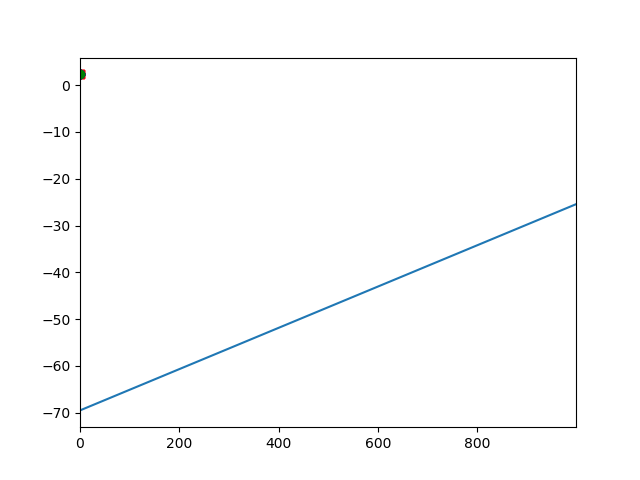

L: 60
629    2.279027
641    2.280537
577    2.272483
717    2.290101
617    2.277517
Name: T, dtype: float64
Tc: 2.27993288590604
L: 80
566    2.270973
582    2.272987
682    2.285570
622    2.278020
670    2.284060
Name: T, dtype: float64
Tc: 2.278322147651007
L: 100
583    2.272987
607    2.276007
627    2.278523
631    2.279027
563    2.270470
Name: T, dtype: float64
Tc: 2.2754026845637583
2.273520067114087
Method: Tlargest
2.271974070779763
2.269185314213022
Tc: 0.0027887565667410463
Method: Trolling
2.2671066817605925
2.269185314213022
Tc: -0.002078632452429563
Method: Tmean
2.2695403762701774
2.269185314213022
Tc: 0.0003550620571552976


In [12]:
df = pd.read_csv('../data/longrun4.csv')
n = 5
Tlargest = []
Trolling = []
Tmean = []
Ls = []
for L in [40,60,80,100]:
    sel = df.loc[df['spins']==L**2]
    print('L: {}'.format(L))
    Tcnlarg = sel.nlargest(n,'cv')['T'].mean()
    print(sel.nlargest(n,'cv')['T'])
    Tcrolling = sel.rolling(n).mean().nlargest(1,'cv')['T'].values[0]
    Trolling.append(Tcrolling)
    print('Tc: {}'.format(Tcnlarg))
    mean = (Tcnlarg+Tcrolling)/2
    Tmean.append(mean)
    Tlargest.append(Tcnlarg)
    plt.scatter(1/L,Tcnlarg,marker='s',color='red')
    plt.scatter(1/L,Tcrolling,color='blue')
    plt.scatter(1/L, mean,color='green')
    Ls.append(L)
    
# print(Tlargest)
# print(Trolling)
# print(Tmean)
a = 0.299
TL = sel.rolling(n).mean().nlargest(1,'cv')['T'].values[0]
L = np.linspace(101,39,1000)
print(TL - a/100)
# print(Tc)


alpha = 0.05
values = np.array([Tlargest,Trolling,Tmean,Ls])
df = pd.DataFrame(values.transpose(),columns=['Tlargest','Trolling','Tmean','L'])
df['L'] = -1/df['L']
for col,mark in zip(['Tlargest','Trolling','Tmean'],['r--','b--','g--']):
    formula = '{} ~ L'.format(col)
    fit = smf.ols(formula=formula, data=df).fit()
    a = fit.params[-1]
    T = fit.params[0]

#     plt.plot(1/L,T - a/L)
    print('Method: {}'.format(col))
    print(T)
    print(2/(np.log(1 + np.sqrt(2))))

#     print(fit.summary())
#     print('a: {}'.format(a))
    print('Tc: {}'.format(T-2/(np.log(1 + np.sqrt(2)))))
    st, data, ss2 = summary_table(fit, alpha=alpha)

    fittedvalues = data[:, 2]
    predict_mean_se  = data[:, 3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
    predict_ci_low, predict_ci_upp = data[:, 6:8].T
    Linv = [ 1/L for L in Ls ]
#     plt.plot(Linv, fittedvalues, '-', lw=2)
#     plt.plot(Linv, predict_ci_low, mark, lw=2)
#     plt.plot(Linv, predict_ci_upp, mark, lw=2)
#     plt.plot(Linv, predict_mean_ci_low, mark, lw=2)
#     plt.plot(Linv, predict_mean_ci_upp, mark, lw=2)
    
    
# sm.graphics.plot_fit(fit, "L")


# Check we got the right things
# print np.max(np.abs(re.fittedvalues - fittedvalues))
# print np.max(np.abs(iv_l - predict_ci_low))
# print np.max(np.abs(iv_u - predict_ci_upp))

# plt.plot(x, y, 'o')
pred = fit.predict(pd.DataFrame(-1/np.linspace(1000,39,1000).transpose()))
pred.plot()

In [132]:
CI = fit.conf_int(alpha=0.001)
CI.loc['Intercept',1]

2.3882726989761505

In [111]:
fit.summary()

/home/eirik/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tmean   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     15.20
Date:                Wed, 13 Nov 2019   Prob (F-statistic):             0.0599
Time:                        17:57:33   Log-Likelihood:                 19.580
No. Observations:                   4   AIC:                            -35.16
Df Residuals:                       2   BIC:                            -36.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2673      0.004    592.351      0.000       2.251       2.284
L             -0.8767      0.225     -3.899      0.060      -1.844       0.091
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.254
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.520
Skew:                           0.664   Prob(JB):                        0.771
Kurtosis:                       1.835   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
dir(fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [ ]:


values = np.array([points,Ls])
df = pd.DataFrame(values.transpose(),columns=['T','L'])
df['L'] = 1/df['L']
fit = smf.ols(formula='T ~ L', data=df).fit()
print(fit.summary())
Ymean, Xmean = df.mean()

top = np.sum((df['L'] - Xmean)*(df['T'] - Ymean))

bottom = np.sum((df['L'] - Xmean)**2)

top/bottom

In [ ]:
# Extract critical temperature

L = 100
spins = L**2
df = pd.read_csv('../data/longrun3.csv')
sel = df.loc[df['spins']==spins]
print(len(sel))

df.loc[df['T'].between(2.265,2.290) ].rolling(3).mean().plot('T','cv')
plt.grid()
df.rolling(3).mean().nlargest(20,'cv')['T'].mean() - 1/100
# largest = sel.nlargest(3,'cv')
# display(largest.max())
# display(sel.sort_values('cv',ascending=False).nlargest(10,'cv')).mean()
# display(largest['T'].mean())
# display(sel['cv'].max())
# sel.loc[sel['cv']==sel['cv'].max()]
# largest.plot('T','cv', linestyle=' ', marker='s')
# T = np.linspace(1,2.4,100)
df = pd.read_csv('../data/longrun3.csv')
# plt.plot(T,np.abs((T-2.269))**(-7/4))

In [ ]:
df = pd.read_csv('../data/longrun3.csv')

Lsmall = [40,60,80]
L = 100
a = 0
n = 10
for i in range(0,2):
    large = df.loc[df['spins']==L**2]
    small = df.loc[df['spins']==Lsmall[i]**2]
    Tlarge = large.nlargest(n,'cv')['T'].mean()
    Tsmall = small.nlargest(n,'cv')['T'].mean()
    print(Tlarge)
    print(Tsmall)
    alocal = ((Tlarge - Tsmall)/(L**-1 -Lsmall[i+1]**-1))
    a += alocal
print('a: {}'.format(a/3))


sel = df.loc[df['spins']==L**2]
Tc = sel.nlargest(1,'cv')['T'].mean()
print(Tc)

L = 100
TL = df.loc[df['spins']==L**2].nlargest(n,'cv')['T'].mean()
print('T_c(L=100): {}'.format(TL))
Tc =  TL - a/L
print(Tc)

In [ ]:
df = pd.read_csv('../data/longrun3.csv')
n = 10
large = df[df['spins']==10000]
# display(large)

# display(large.nlargest(,'cv'))

# large.nlargest(1,'cv').plot.scatter('T','cv')

T = 0
c = 0
for n in range(1,20,2):
    c+=1
    Tnew = (large.rolling(n).mean().nlargest(1,'cv')['T'].values[0])
    T += Tnew
    print(Tnew)
    
print(T/c - 1.17/100)

In [ ]:
df = pd.read_csv('../data/longrun4.csv')
sel = df.loc[df['spins']==10000]
print(len(sel['T']))

degree = 5
params = np.polyfit(sel['T'],sel['cv'], degree)
# stats = params[2]
fig, ax1 = plt.subplots(1)

print(params)

fit = 0
for i in (range(len(params))):
    print(i, -i+degree)
    fit += sel['T']**i*params[-i+degree]
    continue
print(np.max(fit))

# ax1.scatter(sel['T'],stats)
ax1.plot(sel['T'], fit)
# ax1.plot(sel['T'], params[-1] + params[-2]*sel['T'] + sel['T']**2*params[-3])
sel.plot('T','cv',ax=ax1, marker='s',linestyle=' ')
# plt.plot(sel['T'], sel['T'].values[-1]*params)

